In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the dataset
df = pd.read_csv('appliance_energy.csv')

# Display the first few rows to understand the structure
print(df.head())


   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [21]:
# Check for missing values
print(df.isnull().sum()) 
#df = df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


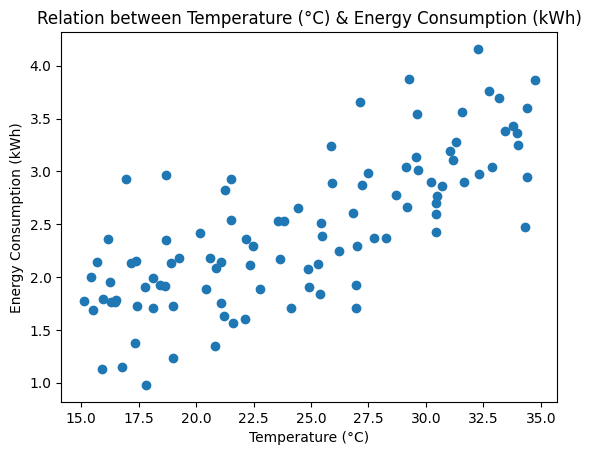

In [22]:
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.title('Relation between Temperature (°C) & Energy Consumption (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.xlabel('Temperature (°C)')
plt.show()

In [23]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['Temperature (°C)']]  
# Dependent variable (Energy Consumption)
y = df['Energy Consumption (kWh)']  

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Get the slope (coefficients)
slope = model.coef_

# Get the y-intercept
y_intercept = model.intercept_

# Print the values
print("Slope (Coefficients):", slope)
print("Y-Intercept:", y_intercept)

Slope (Coefficients): [0.08996618]
Y-Intercept: 0.22196391661907677


In [27]:
# y = mx + c

y = 0.0899*26.97 + 0.22
print('Predicted energy consumption(in Kwh):', y)

Predicted energy consumption(in Kwh): 2.644603


In [28]:
re  = 1.70 - 2.64
print('residual_error:', re)

residual_error: -0.9400000000000002


In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [31]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 0.16342487842925052
R-Squared: 0.6119478445218715


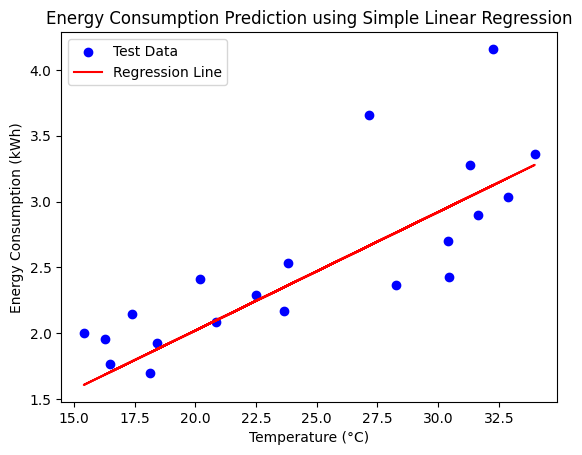

In [32]:
# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [33]:
import joblib
# Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [34]:
# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')

In [35]:
# Example input data
input_data = [[26.97]]  

In [36]:
# Make predictions
prediction = model.predict(input_data)

# Print the prediction
print("Predicted appliance energy consumption:", prediction)

# Actual Energy Consumption = 1.703533

Predicted appliance energy consumption: [2.64835187]


d:\phyton\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
